In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier as knc
import seaborn as sns
from sklearn.metrics import accuracy_score as a_s
from sklearn.feature_extraction import DictVectorizer
iris = sns.load_dataset('iris')

1.3.1

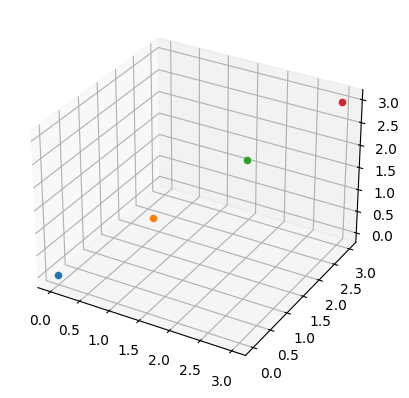

5.196152422706632
2.9999999999999996
1.0
3.0


In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

a = np.array([0, 0, 0])
b = np.array([1, 1, 1])
c = np.array([2, 2, 2])
d = np.array([3, 3, 3])

ax.scatter(0, 0, 0)
ax.scatter(1, 1, 1)
ax.scatter(2, 2, 2)
ax.scatter(3, 3, 3)


plt.show()
#Расстояние Евклида
print(np.linalg.norm(a-d))
#квадрат Евклидова расстояния
print(np.linalg.norm(b-c) ** 2)
#Расстояние Чебышева
print(np.linalg.norm(c-d, ord=np.inf))
#Расстояние Хемминга
print(np.linalg.norm(a-b,ord=1))

2.3.1

,sepal_length,sepal_width,petal_length,petal_width
136,6.3,3.4,5.6,2.4
17,5.1,3.5,1.4,0.3
127,6.1,3.0,4.9,1.8
110,6.5,3.2,5.1,2.0
26,5.0,3.4,1.6,0.4


,species
136,virginica
17,setosa
127,virginica
110,virginica
26,setosa


1
accuracy: 0.957
5
accuracy: 1.0
10
accuracy: 0.957


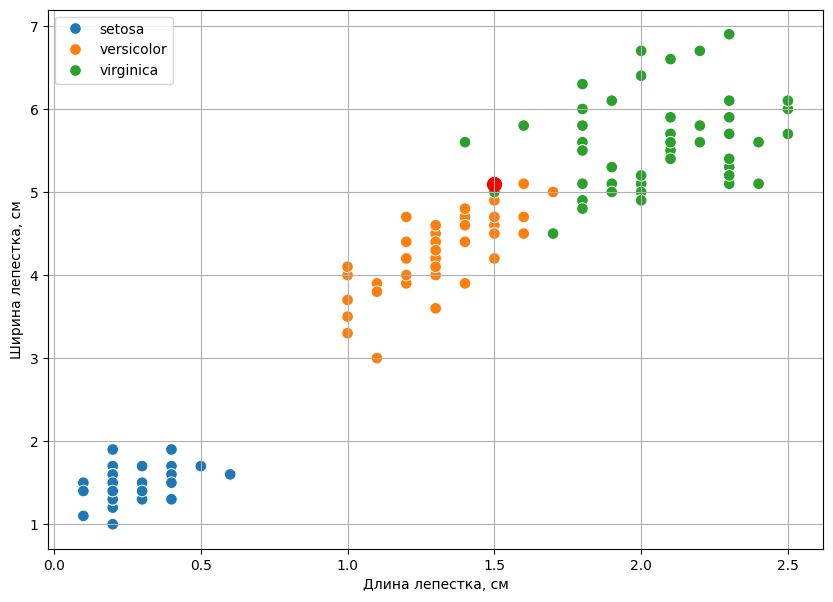

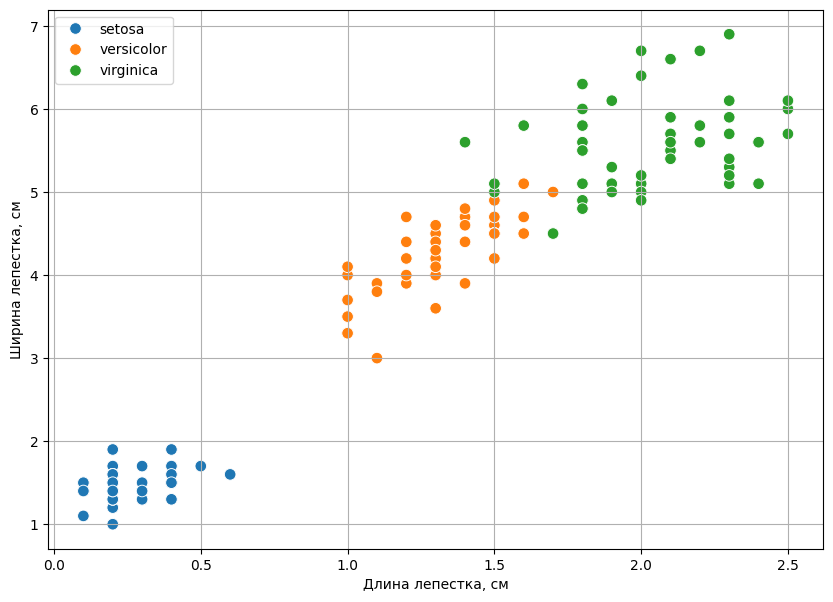

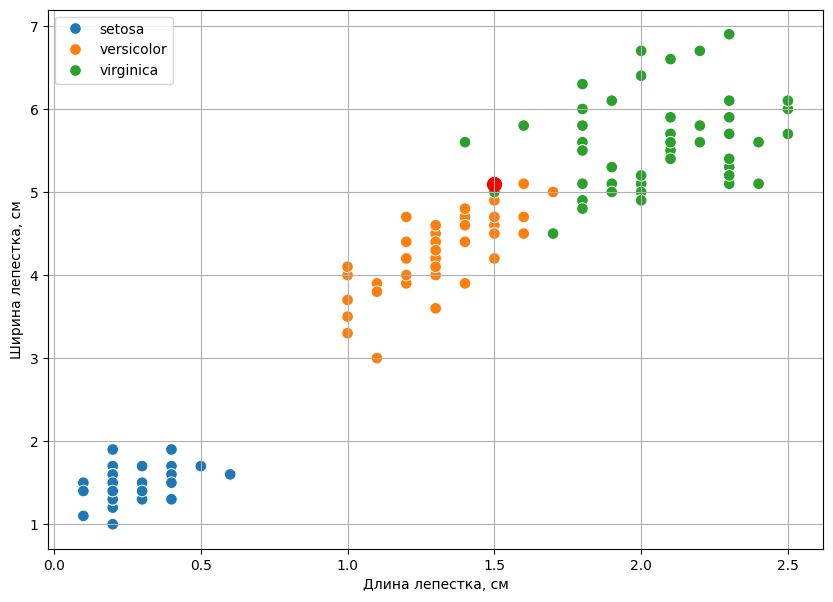

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    iris.iloc[:, :-1],
    iris.iloc[:, -1],
    test_size = 0.15
)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

display(X_train.head())
display(y_train.head())

for h in [1, 5, 10]:
    print(h)
    model = knc(n_neighbors=h)
    model.fit(X_train, y_train)
    model

    y_pred = model.predict(X_test)
    y_pred

    plt.figure(figsize=(10, 7))
    sns.scatterplot(
        data=iris,
        x='petal_width', y='petal_length',
        hue='species',
        s=70
    )
    plt.xlabel('Длина лепестка, см')
    plt.ylabel('Ширина лепестка, см')
    plt.legend(loc=2)
    plt.grid()

    for i in range(len(y_test)):
        if np.array(y_test)[i] != y_pred[i]:
            plt.scatter(X_test.iloc[i, 3], X_test.iloc[i, 2], color='red', s=100)

    print(f'accuracy: {a_s(y_test, y_pred) :.3}')

3.3.2

In [ ]:
from sklearn.feature_extraction import DictVectorizer
data_dict = [{"Имя": "Андрей", "Возраст": "19"},
             {"Имя": "Максим", "Возраст": "18"},
             {"Имя": "Матвей", "Возраст": "22"},
             {"Имя": "Даня", "Возраст": "19"},]

dictVectorizer = DictVectorizer(sparse=False)
features = dictVectorizer.fit_transform(data_dict)
features

array([[0., 1., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 0., 1.],
       [0., 1., 0., 0., 1., 0., 0.]])